## 경사하강법(Gradient Decent)


### 볼록함수(Convex Function)
- 어떤 지점에서 시작하더라도 최적값(손실함수가 최소로하는 점)에 도달할 수 있음

- 1-D Convex Function
<br />![](https://www.researchgate.net/profile/Miodrag_Mateljevic/publication/313821095/figure/fig5/AS:476113622310916@1490525741603/A-strictly-convex-function.png)
<br /><sub>출처: https://www.researchgate.net/figure/A-strictly-convex-function_fig5_313821095</sub>

- 2-D Convex Function  
<br />![](https://www.researchgate.net/publication/275069197/figure/fig8/AS:324418665500689@1454358845613/Sphere-function-D-2.png)
<br /><sub>출처: https://www.researchgate.net/figure/Sphere-function-D-2_fig8_275069197</sub>

### 비볼록함수(Non-Convex Function)

- 비볼록 함수는 시작점 위치에 따라 다른 최적값에 도달할 수 있음.

- 1-D Non-Convex Function
<br />![](https://image1.slideserve.com/2659452/example-of-non-convex-function-l.jpg)

<sub>출처: https://www.slideserve.com/betha/local-and-global-optima</sub>

- 2-D Non-Convex Function

<br />![](https://upload.wikimedia.org/wikipedia/commons/e/e3/Non-Convex_Objective_Function.gif)

<sub>출처: https://commons.wikimedia.org/wiki/File:Non-Convex_Objective_Function.gif</sub>

### 경사하강법


#### 미분과 기울기
- 스칼라를 벡터로 미분한 것

## $\quad \frac{df(x)}{dx} = \lim_{\triangle x \to 0} \frac{f(x+\triangle x) - f(x)}{\triangle x}$

![](https://upload.wikimedia.org/wikipedia/commons/thumb/0/0f/Gradient2.svg/2560px-Gradient2.svg.png)

<sub>출처: https://ko.wikipedia.org/wiki/%EA%B8%B0%EC%9A%B8%EA%B8%B0_(%EB%B2%A1%ED%84%B0)</sub>

  ## $\quad \triangledown f(x) = \left( \frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2},\ ... \ , \frac{\partial f}{\partial x_N} \right)$
  - 변화가 있는 지점에서는 미분값이 존재하고, 변화가 없는 지점은 미분값이 0
  - 미분값이 클수록 변화량이 크다는 의미


#### 경사하강법의 과정

- 경사하강법은 한 스텝마다의 미분값에 따라 이동하는 방향을 결정

- $f(x)$의 값이 변하지 않을 때까지 반복

  ## $\qquad x_n = x_{n-1} - \eta \frac{\partial f}{\partial x}$
    
    - $\eta$ : 학습률(learning rate)

- 즉, **미분값이 0인 지점**을 찾는 방법  

![](https://cdn-images-1.medium.com/max/1600/0*fU8XFt-NCMZGAWND.)
<br /><sub>출처: https://www.kdnuggets.com/2018/06/intuitive-introduction-gradient-descent.html</sub>


- 2-D 경사하강법

![](https://thumbs.gfycat.com/AngryInconsequentialDiplodocus-size_restricted.gif)
<br /><sub>출처: https://gfycat.com/ko/angryinconsequentialdiplodocus</sub>

#### 경사하강법 구현

$\quad f_1(x) = x^2$

In [69]:
def f1(x):
    return x**2

def df_dx1(x):
    return 2*x

In [70]:
def gradient_descent(f, df_dx, init_x, learning_rate=0.01, epochs=100):
    x = init_x
    x_log, y_log = [x], [f(x)]

    for i in range(epochs):
        grad = df_dx(x)
        x -= learning_rate * grad

        x_log.append(x)
        y_log.append(f(x))

    return x_log, y_log

#### 경사하강법 시각화

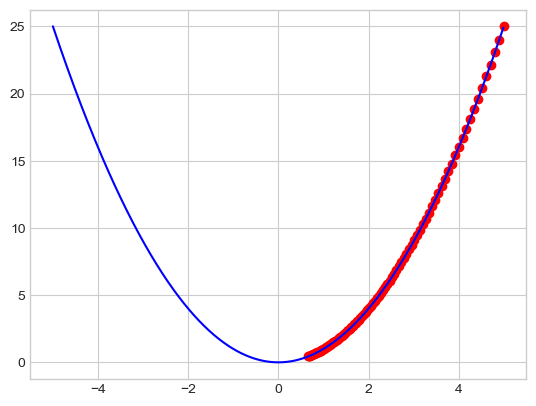

In [71]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(["seaborn-whitegrid"])

x_init = 5
x_log, y_log = gradient_descent(f1, df_dx1, x_init)
plt.scatter(x_log, y_log, color="red")

x = np.arange(-5, 5, 0.01)
y = f1(x)
plt.plot(x, y, color="b")
plt.show()

#### 비볼록 함수(Non-Convex Function)에서의 경사하강법

$\quad f_2(x) = 0.01x^4 - 0.3x^3 - 1.0x + 10.0$

In [72]:
def f2(x):
    return 0.01*x**4 - 0.3*x**3 - 1.0*x + 10.0

def df_dx2(x):
    return 0.04*x**3 - 0.9*x**2 - 1.0

#### 비볼록함수 경사하강법 시각화

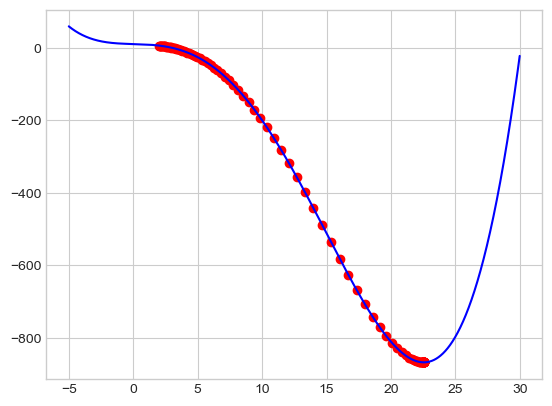

In [73]:
x_init = 2
x_log, y_log = gradient_descent(f2, df_dx2, x_init)
plt.scatter(x_log, y_log, color="r")

x = np.arange(-5, 30, 0.01)
y = f2(x)
plt.plot(x, y, color="b")
plt.show()

### 전역 최적값 vs 지역 최적값
- 초기값이 어니냐에 따라 전체 함수의 최솟값이 될 수도 있고,  
  지역적으로 최솟값일 수 있음

![](https://www.kdnuggets.com/wp-content/uploads/function-max-global.jpg)
<br /><sub>출처: https://www.kdnuggets.com/2017/06/deep-learning-local-minimum.html</sub>

$\quad f_3(x) = x sin(x^2) + 1$ 그래프

In [74]:
def f3(x):
    return x*np.sin(x**2) + 1

def df_dx3(x):
    return np.sin(x**2) + x*np.cos(x**2)*2*x

#### 전역 최솟값 vs 지역 최솟값 시각화

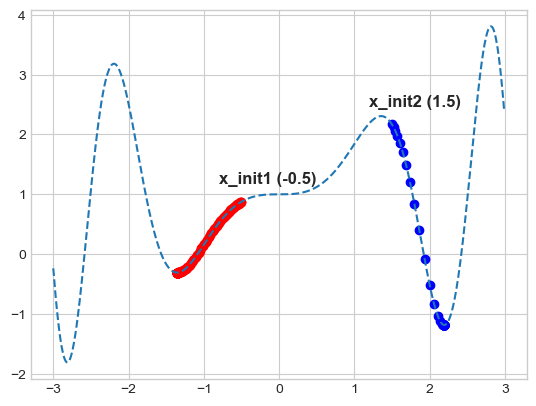

In [75]:
x_init1 = -0.5
y_init1 = f3(x_init1)
x_log1, y_log1 = gradient_descent(f3, df_dx3, x_init1)
plt.scatter(x_log1, y_log1, color="r")
plt.text(x_init1-0.3, y_init1+0.3, "x_init1 ({})".format(x_init1), fontdict={"weight": "bold", "size":12})

x_init2 = 1.5
y_init2 = f3(x_init2)
x_log2, y_log2 = gradient_descent(f3, df_dx3, x_init2)
plt.scatter(x_log2, y_log2, color="b")
plt.text(x_init2-0.3, y_init2+0.3, "x_init2 ({})".format(x_init2), fontdict={"weight": "bold", "size":12})

x = np.arange(-3, 3, 0.01)
y = f3(x)
plt.plot(x, y, "--")

plt.show()

#### 경사하강법 구현(2)
- 경사하강을 진행하는 도중, 최솟값에 이르면 경사하강법을 종료하는 코드

In [76]:
def gradient_descent2(f, df_dx, init_x, learning_rate=0.01, epochs=100):
    eps = 1e-5
    old_x = init_x
    old_y = f(old_x)
    x_log, y_log = [old_x], [old_y]
    min_x, min_y = old_x, old_y

    count = 0
    for i in range(epochs):
        grad = df_dx(old_x)
        new_x = old_x - learning_rate * grad
        new_y = f(new_x)

        if new_y < min_y:
            min_x = new_x
            min_y = new_y

        if np.abs(old_x - new_x) <= eps:
            break
        
        x_log.append(new_x)
        y_log.append(new_y)
        old_x = new_x 
        count += 1

    return x_log, y_log, count

$f_3(x) = x sin(x^2) + 1$ 그래프
- 각 시작점마다 경사하강법으로 내려가다가 최솟값으로 인지하는 부분에서 멈춤 

  step_num(반복횟수)만큼 다 돌지 않는 경우도 발생  

  하지만 주어진 범위 내에서의 최솟값은 첫번째 시작점일 때이다.

count1: 17
count2: 100
count3: 28


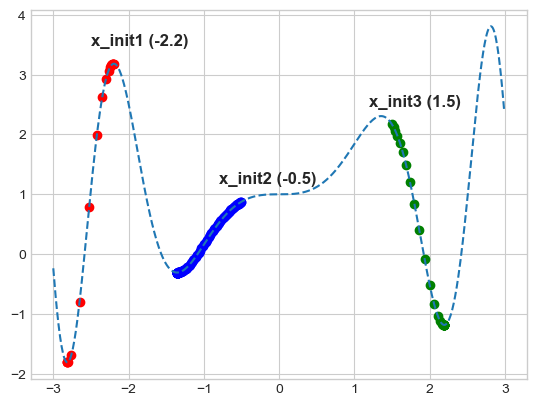

In [77]:
x_init1 = -2.2
y_init1 = f3(x_init1)
x_log1, y_log1, count1 = gradient_descent2(f3, df_dx3, x_init1)
plt.scatter(x_log1, y_log1, color="r")
plt.text(x_init1-0.3, y_init1+0.3, "x_init1 ({})".format(x_init1), fontdict={"weight": "bold", "size":12})
print("count1: {}".format(count1))

x_init2 = -0.5
y_init2 = f3(x_init2)
x_log2, y_log2, count2 = gradient_descent2(f3, df_dx3, x_init2)
plt.scatter(x_log2, y_log2, color="b")
plt.text(x_init2-0.3, y_init2+0.3, "x_init2 ({})".format(x_init2), fontdict={"weight": "bold", "size":12})
print("count2: {}".format(count2))

x_init3 = 1.5
y_init3 = f3(x_init3)
x_log3, y_log3, count3 = gradient_descent2(f3, df_dx3, x_init3)
plt.scatter(x_log3, y_log3, color="g")
plt.text(x_init3-0.3, y_init3+0.3, "x_init3 ({})".format(x_init3), fontdict={"weight": "bold", "size":12})
print("count3: {}".format(count3))

x = np.arange(-3, 3, 0.01)
y = f3(x)
plt.plot(x, y, "--")

plt.show()

### 학습률(learning rate)
- 학습률 값은 적절히 지정해야 한다!
- 너무 크면 발산하고, 너무 작으면 학습이 잘 되지 않는다.
  
![](https://cdn-images-1.medium.com/freeze/max/1000/1*22oh44C5tUHbZ0yvIKWDFg.png)
<br /><sub>출처: https://mc.ai/an-introduction-to-gradient-descent-algorithm/</sub>


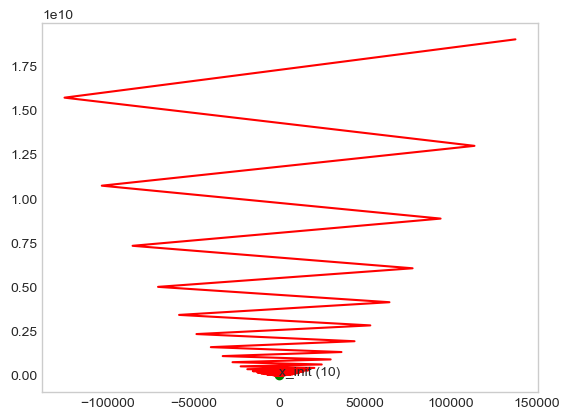

In [79]:
x_init = 10
x_log, y_log, _ = gradient_descent2(f1, df_dx1, x_init, learning_rate=1.05)
plt.plot(x_log, y_log, color="r")

plt.scatter(x_init, f1(x_init), color="green")
plt.text(x_init-2.2, f1(x_init)-2, "x_init ({})".format(x_init), fontsize=10)
x = np.arange(-50, 30, 0.01)
y = f1(x)
plt.plot(x, y, "--")
plt.grid()
plt.show()

#### 학습률별 경사하강법

init value = 0.001, count = 100
init value = 0.01, count = 100
init value = 0.1, count = 60
init value = 1.01, count = 100


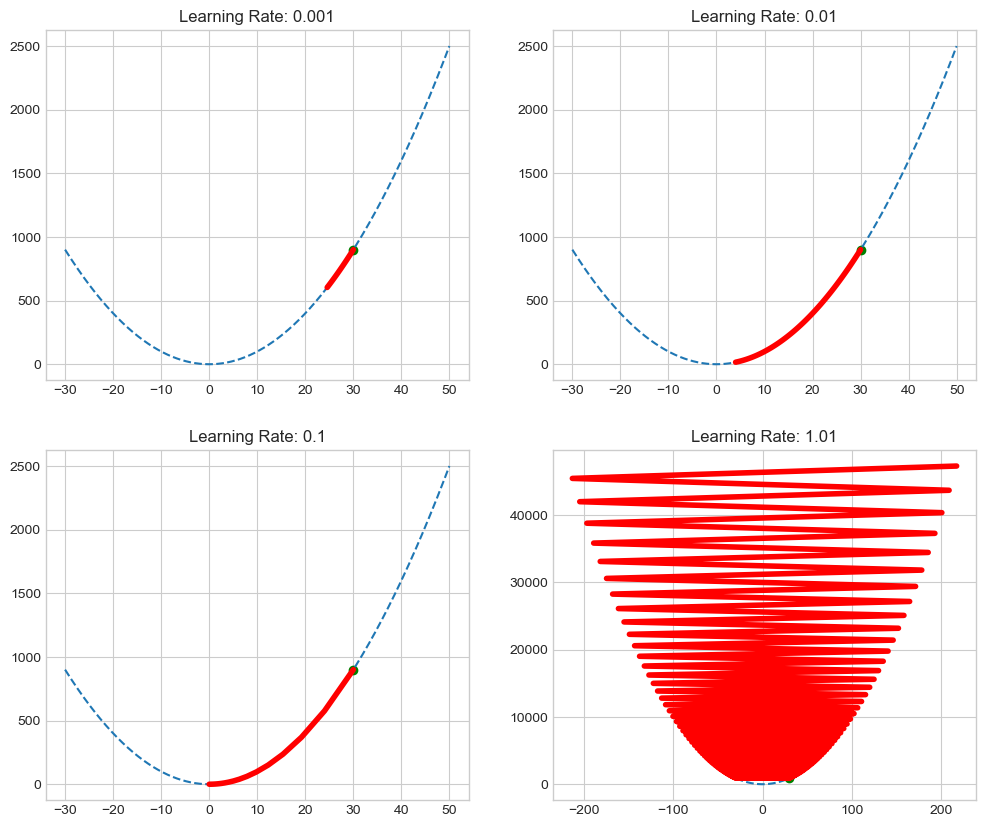

In [113]:
lr_list = [0.001, 0.01, 0.1, 1.01]

init_x = 30
x = np.arange(-30, 50, 0.01)

fig = plt.figure(figsize=(12, 10))
for idx, learning_rate in enumerate(lr_list):
    ax = fig.add_subplot(2, 2, idx + 1)

    ax.plot(x, f1(x), "--")

    x_log, y_log, count = gradient_descent2(f1, df_dx1, init_x, learning_rate=learning_rate)
    ax.plot(x_log, y_log, color="r", linewidth=4.0)
    ax.scatter(init_x, f1(init_x), color="green")

    ax.title.set_text("Learning Rate: {}".format(learning_rate))
    print("init value = {}, count = {}".format(learning_rate, count))

### 안장점(Saddle Point)

- 기울기가 0이지만 극값이 되지 않음
- 경사하강법은 안장점에서 벗어나지 못함

![](https://e7.pngegg.com/pngimages/413/127/png-clipart-saddle-point-graph-of-a-function-gradient-descent-deep-learning-mathematics-mathematics-angle-furniture-thumbnail.png)
<br /><sub>출처: https://www.pngegg.com/en/png-czdxs</sub>

$f_2(x) = 0.01x^4 - 0.3x^3 - 1.0x + 10.0$ 그래프로 확인하기

- 첫번째 시작점  
  - count가 100, 즉 step_num(반복횟수)만큼 루프를 돌았음에도  
  손실함수의 값이 10 언저리에서 멈춤. 변화 X
  - 안장점 (Saddle Point)
  
  - 이는 학습률(learning rate)조절 또는 다른 초기값 설정을 통해 수정해야함

count1: 100
count2: 82
count3: 50


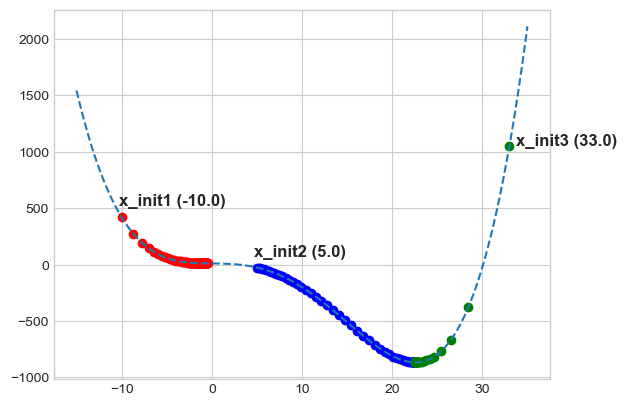

In [121]:
x_init1 = -10.0
y_init1 = f2(x_init1)
x_log1, y_log1, count1 = gradient_descent2(f2, df_dx2, x_init1)
plt.scatter(x_log1, y_log1, color="r")
plt.text(x_init1-0.3, y_init1+100.0, "x_init1 ({})".format(x_init1), fontdict={"weight": "bold", "size":12})
print("count1: {}".format(count1))

x_init2 = 5.0
y_init2 = f2(x_init2)
x_log2, y_log2, count2 = gradient_descent2(f2, df_dx2, x_init2)
plt.scatter(x_log2, y_log2, color="b")
plt.text(x_init2-0.3, y_init2+100.0, "x_init2 ({})".format(x_init2), fontdict={"weight": "bold", "size":12})
print("count2: {}".format(count2))

x_init3 = 33.0
y_init3 = f2(x_init3)
x_log3, y_log3, count3 = gradient_descent2(f2, df_dx2, x_init3)
plt.scatter(x_log3, y_log3, color="g")
plt.text(x_init3+0.7, y_init3+0.3, "x_init3 ({})".format(x_init3), fontdict={"weight": "bold", "size":12})
print("count3: {}".format(count3))

x = np.arange(-15, 35, 0.01)
y = f2(x)
plt.plot(x, y, "--")

plt.show()

$f_3(x) = x sin(x^2) + 1$ 그래프에서 확인하기


count1: 17
count2: 100


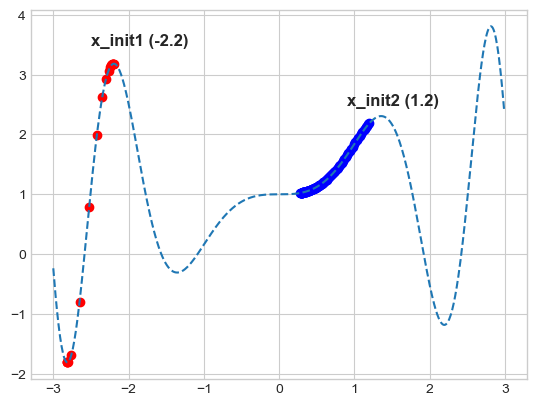

In [123]:
x_init1 = -2.2
y_init1 = f3(x_init1)
x_log1, y_log1, count1 = gradient_descent2(f3, df_dx3, x_init1)
plt.scatter(x_log1, y_log1, color="r")
plt.text(x_init1-0.3, y_init1+0.3, "x_init1 ({})".format(x_init1), fontdict={"weight": "bold", "size":12})
print("count1: {}".format(count1))

x_init2 = 1.2
y_init2 = f3(x_init2)
x_log2, y_log2, count2 = gradient_descent2(f3, df_dx3, x_init2)
plt.scatter(x_log2, y_log2, color="b")
plt.text(x_init2-0.3, y_init2+0.3, "x_init2 ({})".format(x_init2), fontdict={"weight": "bold", "size":12})
print("count2: {}".format(count2))

x = np.arange(-3, 3, 0.01)
y = f3(x)
plt.plot(x, y, "--")

plt.show()